In [1]:
from sympy import *
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

In [2]:
def DH(alpha, theta, a, d):
    return np.array([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)], [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)]
              , [0, sin(alpha), cos(alpha), d], [0, 0, 0, 1]])

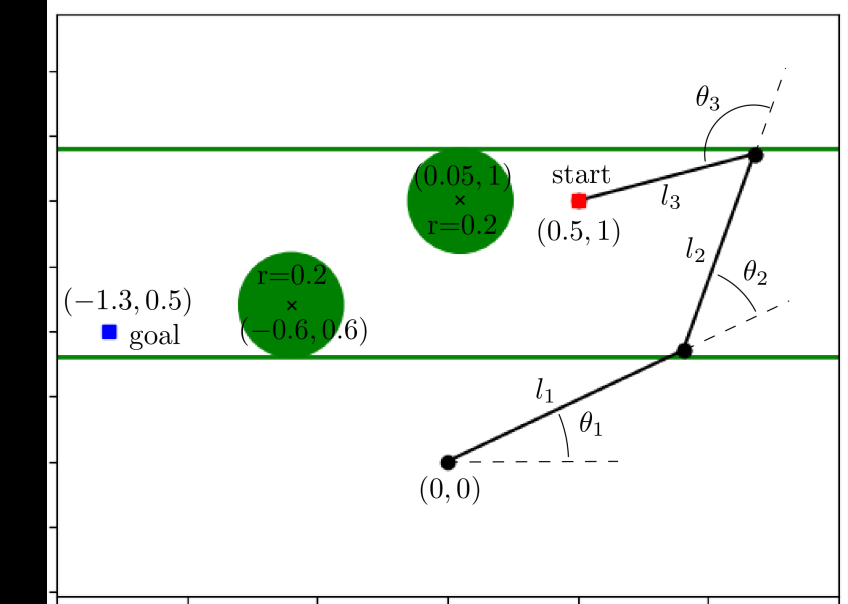

## $$ question    1:$$

In [3]:
'''from now on this is the implementation of the specific hw'''

theta1, l1, theta2, l2, theta3, l3 = symbols('theta1 l1 theta2 l2 theta3 l3')

A01 =DH(0, theta1, 1, 0) 
A12 = DH(0, theta2, 0.8, 0)
A23 = DH(0, theta3, 0.7, 0)
A = simplify(np.dot(np.dot(A01,A12), A23))
A

[[cos(theta1 + theta2 + theta3), -sin(theta1 + theta2 + theta3), 0, 1.0*cos(theta1) + 0.8*cos(theta1 + theta2) + 0.7*cos(theta1 + theta2 + theta3)], [sin(theta1 + theta2 + theta3), cos(theta1 + theta2 + theta3), 0, 1.0*sin(theta1) + 0.8*sin(theta1 + theta2) + 0.7*sin(theta1 + theta2 + theta3)], [0, 0, 1, 0], [0, 0, 0, 1]]

In [4]:
def circle(x, a, y, b, R):
    r = ((x-a)**2 + (y-b)**2)**0.5
    if r > R:
        return False
    return True

In [5]:
q1 = np.random.randint(-180, 180, 10000)
q1 = (q1*np.pi)/180
q2 = np.random.randint(0, 180, 10000)
q2 = (q2*np.pi)/180
q3 = np.random.randint(-180, 180, 10000)
q3 = (q3*np.pi)/180

bubble_1, bubble_2, bubble_3 = [], [], []
free_1, free_2, free_3 = [], [], []

for ind in range(10000):
    Ai = A.subs([(theta1, q1[ind]), (theta2, q2[ind]), (theta3, q3[ind])])
    bi = Ai[:2,3]
    if bi[1] <= 0.4 or bi[1] >= 1.2 or circle(bi[0], 0.05, bi[1], 1, 0.2) or circle(bi[0], -0.6, bi[1], 0.6, 0.2):
        bubble_1.append(q1[ind]*(180/np.pi))
        bubble_2.append(q2[ind]*(180/np.pi))
        bubble_3.append(q3[ind]*(180/np.pi))
    else:
        free_1.append(q1[ind]*(180/np.pi))
        free_2.append(q2[ind]*(180/np.pi))
        free_3.append(q3[ind]*(180/np.pi))

In [6]:
def three_d(df, title, orientation):
    plt.close()
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['q1'], df['q2'], df['q3'], c='dimgray', s=200, marker='o') #skyblue
    ax.view_init(orientation[0], orientation[1])
    ax.set_xlabel(r'$q _1  ( \theta _1) $', fontsize=20)
    ax.set_ylabel(r'$q _2  ( \theta _2) $', fontsize=20)
    ax.set_zlabel(r'$q _3  ( \theta _3) $', fontsize=20)
    plt.title(title, fontsize=30)
    plt.show()


In [7]:
obs = pd.DataFrame({'q1':bubble_1, 'q2':bubble_2, 'q3':bubble_3})
free = pd.DataFrame({'q1':free_1, 'q2':free_2, 'q3':free_3})

In [8]:
#three_d(obs, 'Obsticle Space: $ Q _{obs} orientaion 1 $', [30, 75])

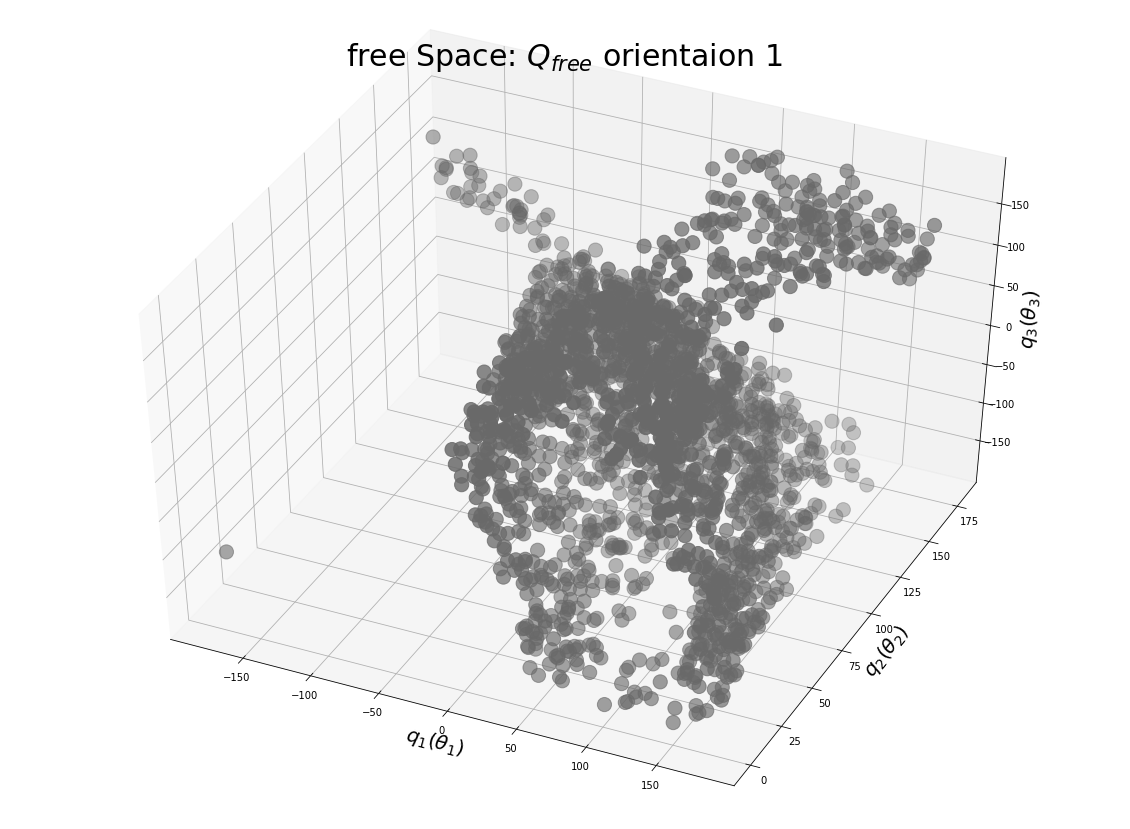

In [9]:
three_d(free, 'free Space: $Q _{free}$ orientaion 1 ', (45, -65))

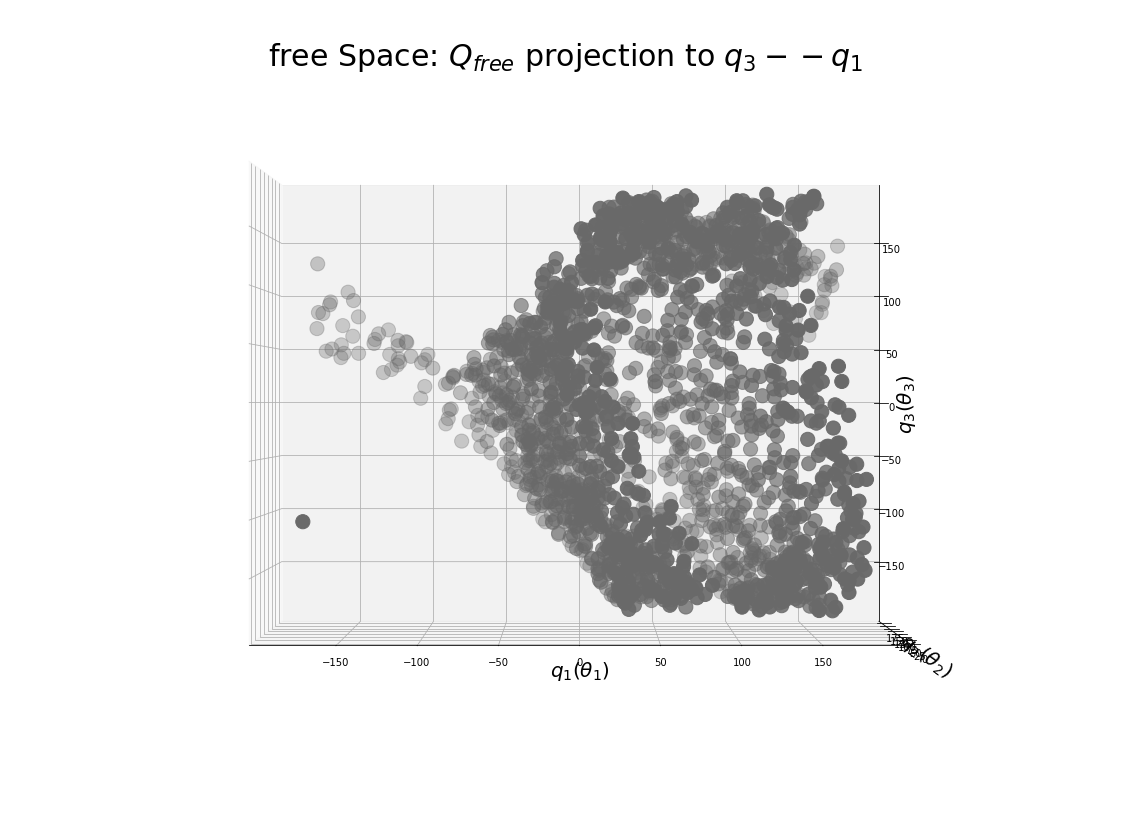

In [10]:
three_d(free, 'free Space: $Q _{free}$ projection to $q _{3}--q _{1}$', (0, -90))

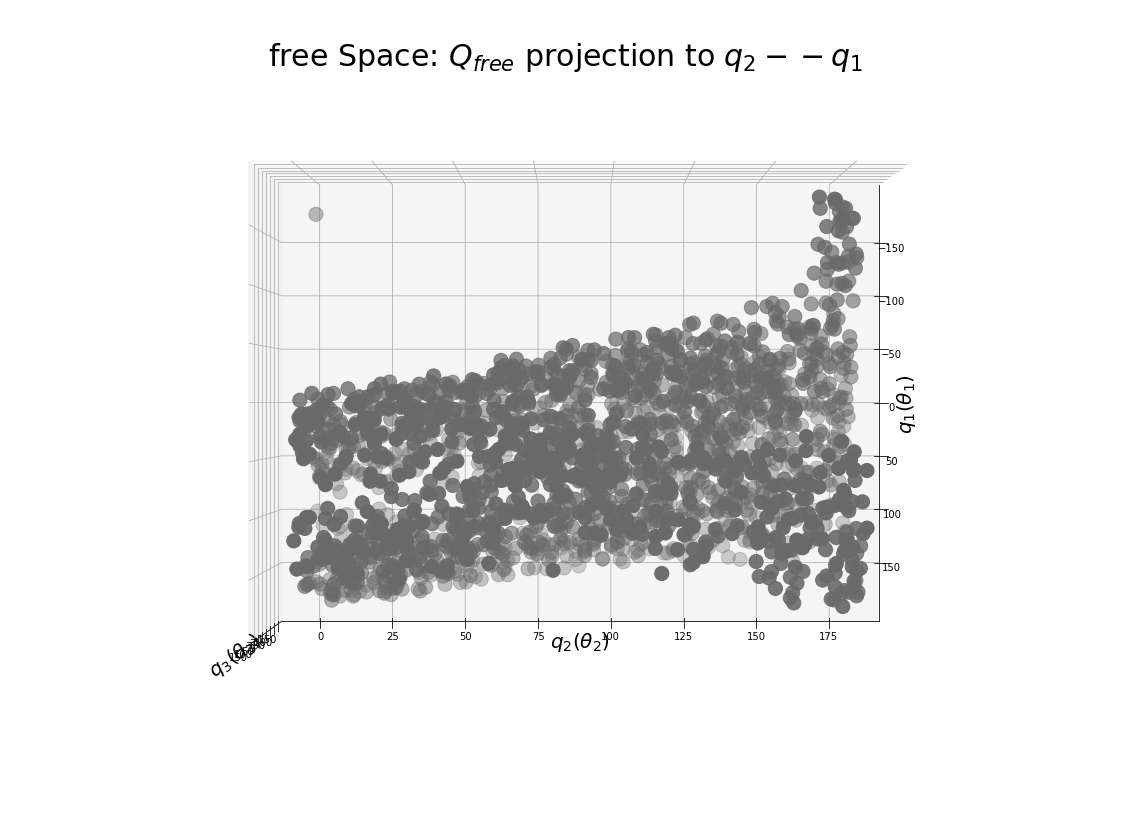

In [11]:
three_d(free, 'free Space: $Q _{free}$ projection to $ q _{2} -- q _{1}$', (90, 0))

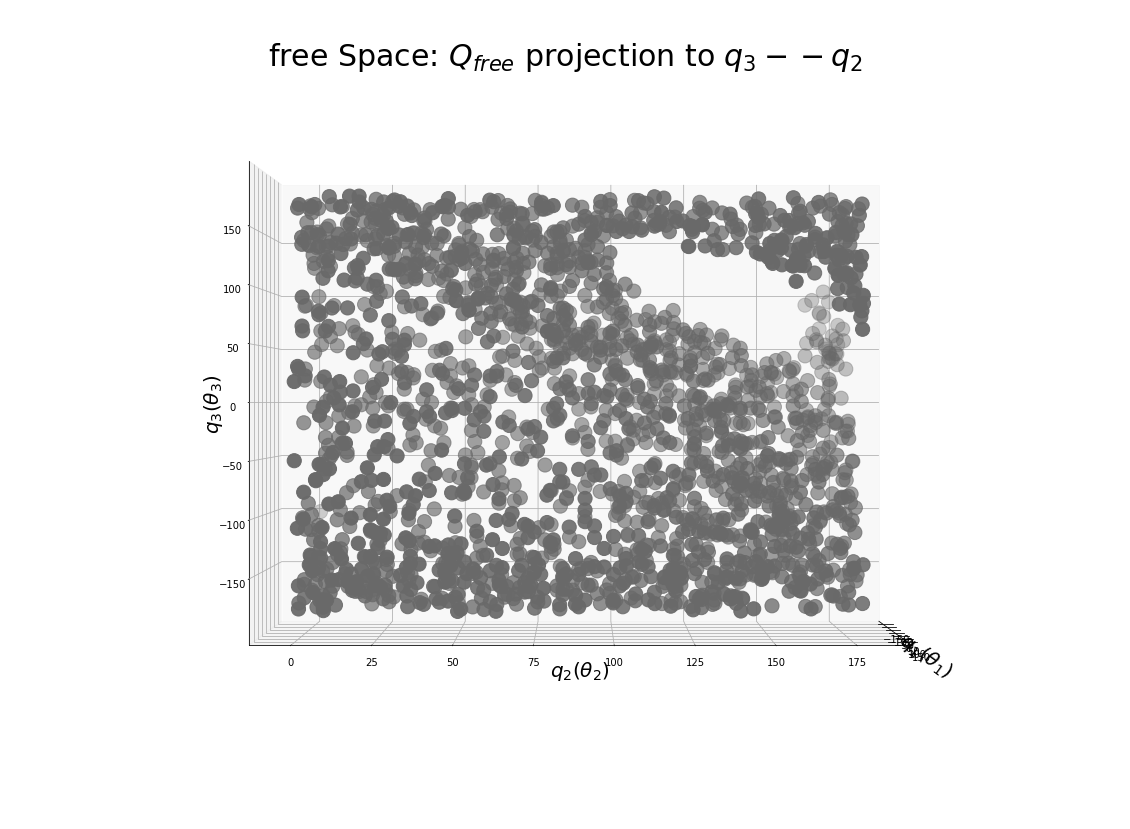

In [12]:
three_d(free, 'free Space: $Q _{free}$ projection to $ q _{3} -- q _{2}$', (0, 0))

In [13]:
from mpl_toolkits.mplot3d import Axes3D



# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(free['q1'], free['q2'], free['q3'], c='dimgray', s=10, marker='o') 
    ax.set_xlabel(r'$q _1  ( \theta _1) $', fontsize=20)
    ax.set_ylabel(r'$q _2  ( \theta _2) $', fontsize=20)
    ax.set_zlabel(r'$q _3  ( \theta _3) $', fontsize=20)
    plt.title('free Space: $Q _{free}$ ', fontsize=30)
    ax.view_init(30,angle)

    filename= 'togif\Volcano_step'+str(angle)+'.png'
    #plt.savefig(filename, dpi=96)
    plt.gca()
    plt.close(fig)
 
    

In [14]:
import glob
from PIL import Image
 

# Create the frames
frames = []
imgs = glob.glob("togif\*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

#Save into a GIF file that loops forever

frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

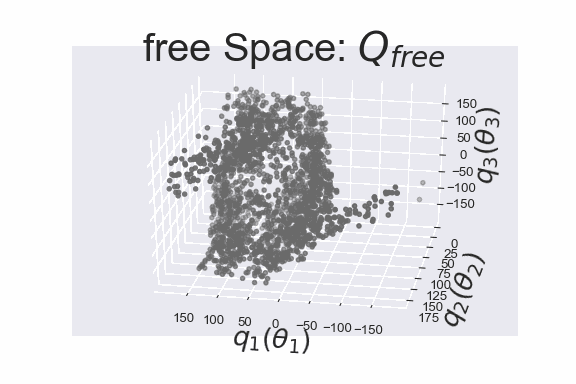

In [15]:
rr = simplify(np.dot(A01,A12))

In [16]:
rr[0,3]

1.0*cos(theta1) + 0.8*cos(theta1 + theta2)

# question 2:
## a. 
## נרצה לתכנן את המסלול של התפסנית מנקודת ההתחלה לנקודת הסיום.
<br>
 ניעזר באלגוריתם PRM.
<br>
 באמצעות אלגוריתם זה, נקבל מסלול ראשוני וחלוקה של המסלול לתתי חלקים. בכך בעצם נצמצם את מימד הפולינום - נבצע שרשור של הפולינומים של כל מקטע. 
<br>
 לאחר שנקבל את הנקודות דרכם נדרוש שהתפסנית תעבור, נתכנן את המסלול בשיטת הפולינומים (polynomial interpulation).


In [17]:
import sys
sys.path.insert(1, 'C:/Users/owner/PythonRobotics/PathPlanning/ProbabilisticRoadMap')
import probabilistic_road_map

In [18]:
import math
from math import pi

def points_on_circle(center=(0, 0), r=50, n=100):
    return [
        (
            center[0]+(math.cos(2 * pi / n * x) * r), 
            center[1] + (math.sin(2 * pi / n * x) * r)

        ) for x in range(0, n + 1)]


top_circle = points_on_circle((0.05, 1), 0.2, 100)
bottom_circle = points_on_circle((-0.6, 0.6), 0.2, 100)
top_line = [(x, 1.2) for x in np.linspace(-1.5, 1.5, num=100)]
bottom_line = [(x, 0.4) for x in np.linspace(-1.5, 1.5, num=100)]
all_obs = top_circle + bottom_circle + top_line + bottom_line

In [19]:
ox, oy = [], []
for x in all_obs:
    ox.append(x[0])
    oy.append(x[1])

In [20]:
sx, sy = 0.5, 1
gx, gy = -1.3, 0.5

In [21]:
rx, ry = probabilistic_road_map.PRM_planning(sx, sy, gx, gy, ox, oy, 0.01)

goal is found!


In [22]:
rx_new = rx.copy()
rx_new = rx_new[::-1]
ry_new = ry.copy()
ry_new = ry_new[::-1]

##  Now we will implement the polynomial Interpulation:
$$ \theta _i (t) = b _0 +b _1t^2 +b _2t^3 +b _3t^4 $$ 
<br>
$$ \theta _i (0)= \theta _{i-1, end}$$
$$ \theta _i (T _i) = \theta _{i, end} $$
$$ \dot{\theta} _i (0) = 0 $$
$$ \dot{\theta} _i (T _i) = 0 $$

In [23]:
theta_s = np.array([30, 8.682187, 180]) #i=0
theta_g = np.array([70, 100, 65.7497]) #i=g

def poly_iter(t, T, theta_start, theta_goal):
    return theta_start + ((3*((t/T)**2))-(2*((t/T)**3)))*(theta_goal-theta_start)

In [24]:
A[:2,3]

[1.0*cos(theta1) + 0.8*cos(theta1 + theta2) + 0.7*cos(theta1 + theta2 + theta3), 1.0*sin(theta1) + 0.8*sin(theta1 + theta2) + 0.7*sin(theta1 + theta2 + theta3)]

In [25]:
free['x'] = free.apply(lambda row: np.cos(row.q1) + 0.8*np.cos(row.q1+row.q2) + 0.7*np.cos(row.q1 + row.q2 + row.q3), axis = 1) 
free['y'] = free.apply(lambda row: np.sin(row.q1) + 0.8*np.sin(row.q1+row.q2) + 0.7*np.sin(row.q1 + row.q2 + row.q3), axis = 1) 

In [26]:
free.head()

q1     q2     q3         x         y
0 -53.0  129.0  -21.0 -0.243329 -0.642868
1  93.0   91.0   43.0  0.630333  0.337726
2  83.0    8.0 -157.0 -1.245707  1.071740
3  50.0  108.0   15.0  0.765119  0.226717
4  25.0   41.0 -132.0 -0.508268 -0.135007

In [27]:
road = None
for i in range(len(rx_new)):
    if road is None:
        to_road = free[(abs(free.x - rx_new[i]) < 0.01) & (abs(free.y - ry_new[i]) < 0.01)]
        if len(to_road) == 1:
            road = to_road
        elif len(to_road) == 0:
            tr=True
            ind = 0.02
            while tr:
                to_road = free[(abs(free.x - rx_new[i]) < ind) & (abs(free.y - ry_new[i]) < ind)]
                if len(to_road) != 0:
                    road = to_road.iloc[[0]]
                    tr = False
                else:
                    ind += 1
        else:
            road = to_road.iloc[[0]]
    else:
        to_road = free[(abs(free.x - rx_new[i]) < 0.01) & (abs(free.y - ry_new[i]) < 0.01)]
        if len(to_road) == 1:
            road = pd.concat([road, to_road])
        elif len(to_road) == 0:
            tr=True
            ind = 0.02
            while tr:
                to_road = free[(abs(free.x - rx_new[i]) < ind) & (abs(free.y - ry_new[i]) < ind)]
                if len(to_road) != 0:
                    road = pd.concat([road, to_road.iloc[[0]]])
                    tr = False
                    break
                else:
                    ind += 1
        else:
            road = pd.concat([road, to_road.iloc[[0]]])
            

In [28]:
road.reset_index(inplace=True)


In [29]:
t_array = np.linspace(0,1,50)
T = 1
road['qi'] = road[:-1].apply(lambda row: [poly_iter(i, T, np.array([row.q1, row.q2, row.q3]), np.array([road['q1'][row.name+1], road['q2'][row.name+1], road['q3'][row.name+1]])) for i in t_array], axis = 1) 

In [30]:
q1_time, q2_time, q3_time = [], [], []

for index, row in road[:-1].iterrows():
    for j in row.qi:
        q1_time.append(j[0])
        q2_time.append(j[1])
        q3_time.append(j[2])

In [31]:
t = np.array([])
for i in range(len(road[:-1])):
    t = np.concatenate((t, np.linspace(i,i+1,50)),  axis=0)

# גרף זוויות המנועים כתלות בזמן:

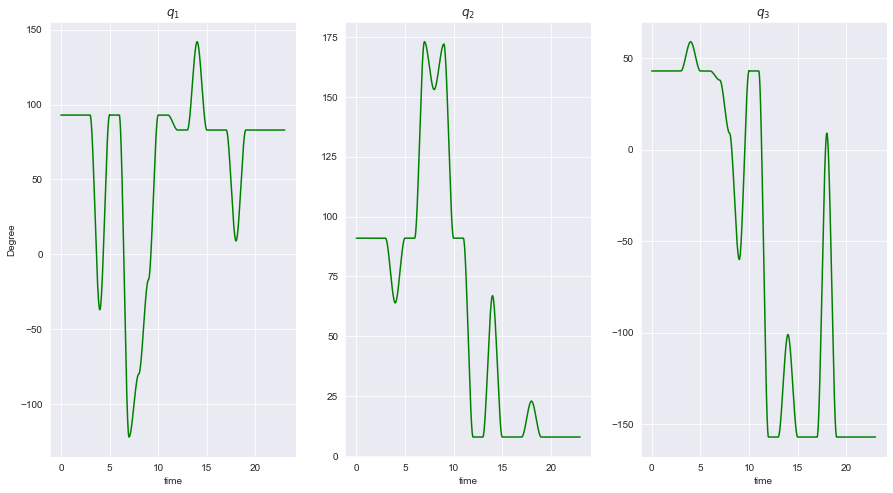

In [32]:
import seaborn as sns

sns.set_style('darkgrid')

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
axs[0].plot(t, q1_time, color='g')
axs[0].set_title('$q_1$')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Degree')
axs[1].plot(t, q2_time, color='g')
axs[1].set_title('$q_2$')
axs[1].set_xlabel('time')
axs[2].plot(t, q3_time, color='g')
axs[2].set_title('$q_3$')
axs[2].set_xlabel('time')
plt.show()

# גרף מיקום התפסנית במישור X-Y: 

(-1.3900000000000001, 0.59, 0.36000000000000004, 1.2399999999999998)

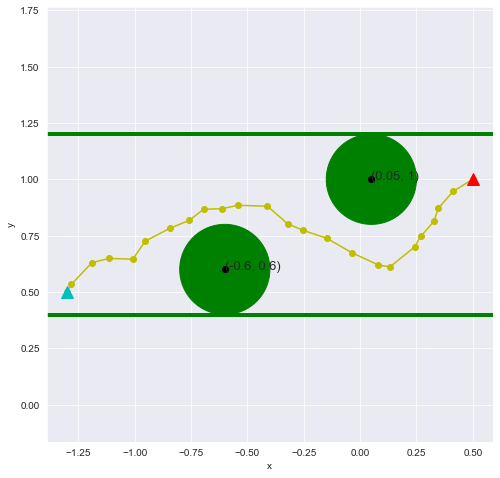

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(rx, ry, color='y', marker='o')
plt.axhline(y=1.2, color='g', linestyle='-', lw=4)
plt.axhline(y=0.4, color='g', linestyle='-', lw=4)
plt.plot(sx, sy, "^r", ms=12)
plt.plot(gx, gy, "^c", ms=12)
circle1 = plt.Circle((0.05, 1), 0.2, color='g')
circle2 = plt.Circle((-0.6, 0.6), 0.2, color='g')
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(-0.6, 0.6,'black', marker='o') 
plt.text(-0.6, 0.6, '({}, {})'.format(-0.6, 0.6), fontsize=13)
plt.plot(0.05, 1,'black', marker='o') 
plt.text(0.05, 1, '({}, {})'.format(0.05, 1), fontsize=13)
plt.grid(True)
plt.axis("equal")

# question 3:

(-1.3900000000000001, 0.59, 0.36000000000000004, 1.24)

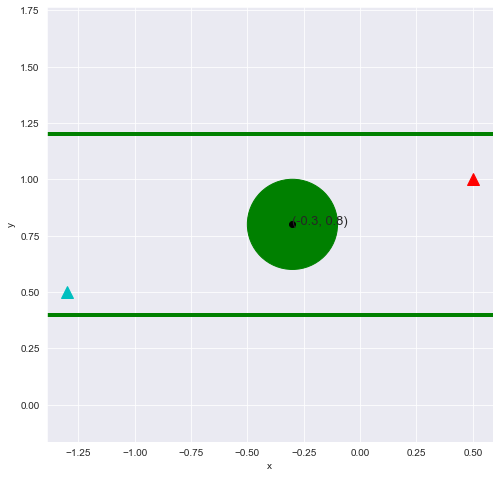

In [34]:
plt.close()
fig, ax = plt.subplots(figsize=(8, 8))
#plt.plot(rx, ry, color='y', marker='o')
plt.axhline(y=1.2, color='g', linestyle='-', lw=4)
plt.axhline(y=0.4, color='g', linestyle='-', lw=4)
plt.plot(sx, sy, "^r", ms=12)
plt.plot(gx, gy, "^c", ms=12)
circle1 = plt.Circle((-0.3, 0.8), 0.2, color='g')
ax.add_artist(circle1)
plt.plot(-0.3, 0.8,'black', marker='o') 
plt.text(-0.3, 0.8, '({}, {})'.format(-0.3, 0.8), fontsize=13)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.axis("equal")

## כעת, נתכנן מסלול באמצעות פונקציית פוטנציאל (2 יישומים שונים):

### תחילה נגדיר את פונקציות הפוטנציאל, נגזור אותן ונקבל את גרדיאנט פונקציית הפוטנציאל:

In [39]:
zeta = 5  # attractive potential gain
eta = 0.5 # repulsive potential gain


def attractive_f(x, y, gx, gy):
    return np.array([zeta*(x - gx), zeta*(y - gy)])

def repulsive_f(x, y, gx, gy, q_star):
    dq = np.hypot(x+0.3, y-0.8) - 0.2
    grad_dq = np.array([(x+0.3)/(dq+0.2), (y-0.8)/(dq+0.2)])
    if dq <= q_star:
        return eta*((1/q_star) - (1/dq))*(1/(dq**2))*grad_dq
    return 0

def potential_grad(x, y, gx, gy, q_star):
    return -1*(attractive_f(x, y, gx, gy) + repulsive_f(x, y, gx, gy, q_star))



In [40]:
xx, yy =[], []
q = np.array([sx, sy])
p = potential_grad(q[0], q[1], gx, gy, 0.01)

### כעת נבצע איטרציות עד שנגיע למטרה:

In [41]:
while np.hypot(p[0], p[1]) > 0.1:
    q += 0.001*p
    xx.append(q[0])
    yy.append(q[1])
    p = potential_grad(q[0], q[1], gx, gy, 0.1)

(-1.3900000000000001, 0.59, 0.36000000000000004, 1.2399999999999998)

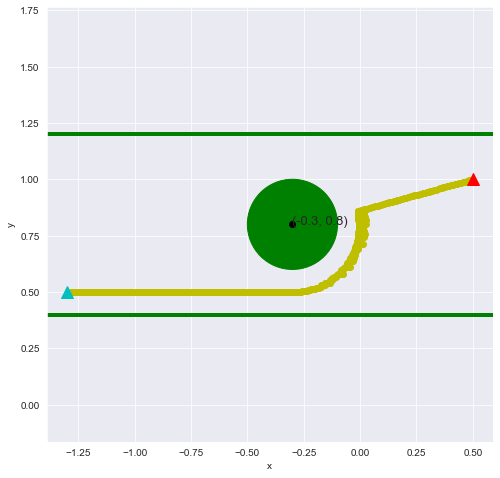

In [42]:
plt.close()
fig, ax = plt.subplots(figsize=(8, 8))
#plt.plot(rx2, ry2, color='y', marker='o')
plt.plot(xx, yy, color='y', marker='o')
plt.axhline(y=1.2, color='g', linestyle='-', lw=4)
plt.axhline(y=0.4, color='g', linestyle='-', lw=4)
plt.plot(sx, sy, "^r", ms=12)
plt.plot(gx, gy, "^c", ms=12)
circle1 = plt.Circle((-0.3, 0.8), 0.2, color='g')
ax.add_artist(circle1)
plt.plot(-0.3, 0.8,'black', marker='o') 
plt.text(-0.3, 0.8, '({}, {})'.format(-0.3, 0.8), fontsize=13)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.axis("equal")

### יישום נוסף:

In [43]:
sys.path.insert(1, 'C:/Users/owner/PythonRobotics/PathPlanning/PotentialFieldPlanning')
import potential_field_planning

In [44]:
circle = points_on_circle((-0.3, 0.8), 0.2, 500)
all_obs2 = circle + top_line + bottom_line

In [45]:
ox2, oy2 = [], []
for x in all_obs2:
    ox2.append(x[0])
    oy2.append(x[1])

In [50]:
rx2, ry2 = potential_field_planning.potential_field_planning(sx, sy, gx, gy, ox2, oy2, 0.1, 0.02)

Goal!!


(-1.3900000000000001, 0.59, 0.36, 1.2399999999999998)

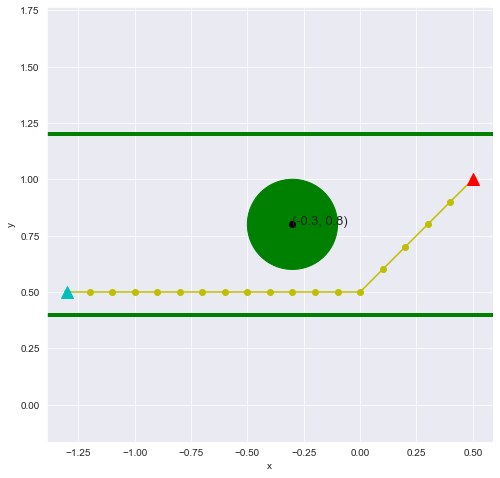

In [51]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(rx2, ry2, color='y', marker='o')
#plt.plot(xx, yy, color='y', marker='o')
plt.axhline(y=1.2, color='g', linestyle='-', lw=4)
plt.axhline(y=0.4, color='g', linestyle='-', lw=4)
plt.plot(sx, sy, "^r", ms=12)
plt.plot(gx, gy, "^c", ms=12)
circle1 = plt.Circle((-0.3, 0.8), 0.2, color='g')
ax.add_artist(circle1)
plt.plot(-0.3, 0.8,'black', marker='o') 
plt.text(-0.3, 0.8, '({}, {})'.format(-0.3, 0.8), fontsize=13)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.axis("equal")